In [10]:
from pca_functions import *

In [11]:
df_90 = pd.read_csv(r'D:\vr-pipeline\data\results\28052025_segment_data_t123_90s_1s_ketone.csv')
#df_45= pd.read_csv(r'D:\vr-pipeline\data\results\22052025_segment_data_t123_45s_45s_ketone.csv')
df_30 = pd.read_csv(r'D:\vr-pipeline\data\results\28052025_segment_data_t123_30s_30s_ketone.csv')


df_all = pd.concat([df_90, df_30], ignore_index=True)

In [12]:
df_30_elevated_platform=df_30[df_30['trial'] == 11]
df_30_elevated_platform['unsafe_time_spent'] = df_30_elevated_platform['unsafe_time_spent'] + df_30_elevated_platform['outside_time_spent']
df_30_pca = df_30_elevated_platform.drop(columns=['participant_id','edge_dist','drink', 'session','trial', 'version', 'segment', 'stops_count', 'outside_time_spent'])
scaler=StandardScaler()
df_30_pca_scaled=scaler.fit_transform(df_30_pca)
find_num_components_explaining_90variance(df_30_pca_scaled)

No. of components explaining 80 % of the variance in data: 3
No. of components explaining 85 % of the variance in data: 4
No. of components explaining 90 % of the variance in data: 5
No. of components explaining 95 % of the variance in data: 6
No. of components explaining 99 % of the variance in data: 9


C:\Users\lal\AppData\Local\Temp\ipykernel_22108\3275134190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_30_elevated_platform['unsafe_time_spent'] = df_30_elevated_platform['unsafe_time_spent'] + df_30_elevated_platform['outside_time_spent']


In [13]:
df_30_pca_df = pd.DataFrame(df_30_pca_scaled, columns=df_30_pca.columns)
reduced_3_data_30=reduce_data(df_30_pca_df, 3)

Proportion of variance explained by each of the 3 components is: [0.41282885 0.22622238 0.1435276 ]
Total explained variance by 3 components is: 78.25788260719604


In [14]:
reduced_3_data_30_df = pd.DataFrame(reduced_3_data_30, columns=[f'PC{i+1}' for i in range(reduced_3_data_30.shape[1])])
reduced_3_data_30_df

,PC1,PC2,PC3
0,-0.150086,1.531228,-1.139985
1,2.194677,-1.221010,-0.733623
2,1.875238,0.780142,-0.205663
3,2.668572,-1.812894,0.507477
4,3.521293,-1.697355,0.802243
...,...,...,...
109,2.357538,0.344973,-1.530817
110,3.303832,0.543023,0.229725
111,1.927693,1.012572,-0.922212
112,2.778136,-0.637425,-0.867821


In [15]:
combined_30_elevated_platform = pd.concat([
    df_30_elevated_platform[['participant_id', 'session', 'drink', 'segment']].reset_index(drop=True),
    reduced_3_data_30_df[['PC1', 'PC2', 'PC3']].reset_index(drop=True)
], axis=1)


In [16]:
#combined_30_elevated_platform.to_csv('../data/pca/combined_30_elevated_platform_pca.csv', index=False)

In [17]:
component_weight_30_elevated_platform = components_weight(df_30_pca_df, 3)

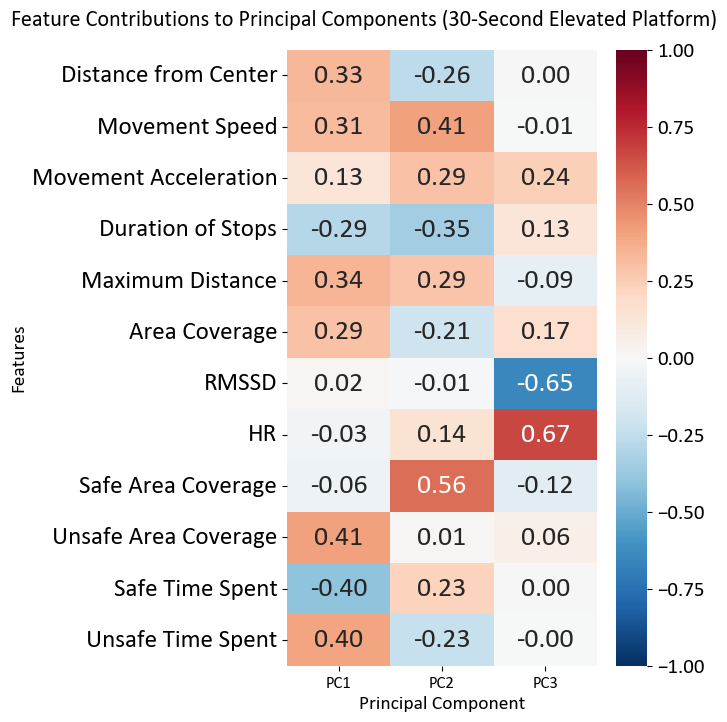

In [18]:
component_weight_30_elevated_platform = component_weight_30_elevated_platform.rename(
    columns={
        'center_dist': 'Distance from Center',
        'speed': 'Movement Speed',
        'acceleration': 'Movement Acceleration',
        'stops_duration': 'Duration of Stops',
        'max_distance': 'Maximum Distance',
        'area_covered': 'Area Coverage',
        'rmssd': 'RMSSD',
        'hr': 'HR',
        'safe_area_coverage': 'Safe Area Coverage',
        'unsafe_area_coverage': 'Unsafe Area Coverage',
        'safe_time_spent': 'Safe Time Spent',
        'unsafe_time_spent': 'Unsafe Time Spent'
    }
)

# Add title now!

fig, ax=display_pc_weights_1(component_weight_30_elevated_platform, is_horizontal=False, save_fig=False)

plt.suptitle("Feature Contributions to Principal Components (30-Second Elevated Platform)", fontsize=16, x=0.28, y=0.93)


plt.show()